In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

# Load the Dataset
df = pd.read_csv('creditcard_2023.csv')

# Investigate Dataset - checking for missing values and duplicated values
df.isna().sum()
df.duplicated().any()

False

In [3]:
features = df.drop(['id', 'Class'], axis=1)
labels = df['Class']

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features.iloc[:, 0:28])

# print('PCA Components: \n', pca.components_)
# print('PCA Features: \n', pca_features)

lab = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_features, 
    labels=lab,
    dimensions=range(2),
    color=labels
)

fig.show()

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train)

pred_train = gmm.predict(X_train)
train_accuracy = accuracy_score(y_train, pred_train)
pred_test = gmm.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)

print('Train Accuracy: ', train_accuracy, '\nTest Accuracy: ', test_accuracy)

Train Accuracy:  0.9171781298911419 
Test Accuracy:  0.9178112305013805


              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56620
           1       0.97      0.86      0.91     57106

    accuracy                           0.92    113726
   macro avg       0.92      0.92      0.92    113726
weighted avg       0.92      0.92      0.92    113726



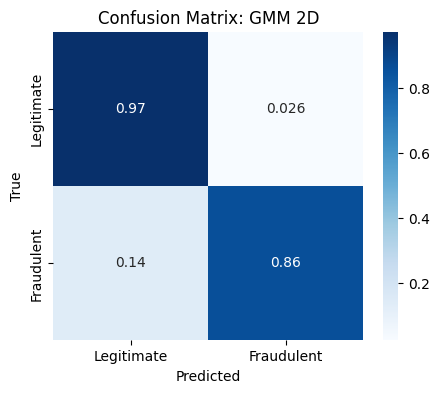

In [7]:
print(classification_report(y_test, pred_test))

confusion = confusion_matrix(y_test, pred_test)
confusion = confusion / np.sum(confusion, axis=1)

plot.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, cmap=plot.cm.Blues)
class_names = ['Legitimate', 'Fraudulent']
tick_marks = np.arange(len(class_names)) + 0.5
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
plot.xlabel('Predicted')
plot.ylabel('True')
plot.title('Confusion Matrix: GMM 2D', wrap=True)
plot.show()

In [ ]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features.iloc[:, 0:28])

# print('PCA Components: \n', pca.components_)
# print('PCA Features: \n', pca_features)

lab = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_features, 
    labels=lab,
    dimensions=range(3),
    color=labels
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train)

pred_train = gmm.predict(X_train)
train_accuracy = accuracy_score(y_train, pred_train)
pred_test = gmm.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)

print('Train Accuracy: ', train_accuracy, '\nTest Accuracy: ', test_accuracy)

Train Accuracy:  0.9162284789757839 
Test Accuracy:  0.9138279724952957


              precision    recall  f1-score   support

           0       0.87      0.97      0.92     56583
           1       0.97      0.86      0.91     57143

    accuracy                           0.91    113726
   macro avg       0.92      0.91      0.91    113726
weighted avg       0.92      0.91      0.91    113726



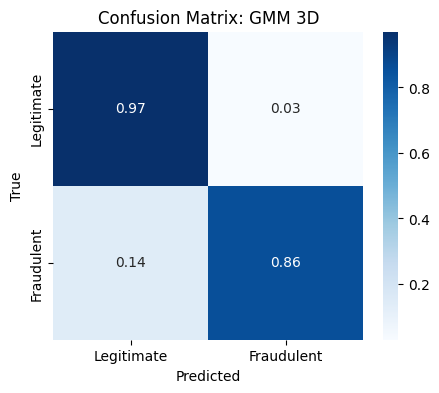

In [10]:
print(classification_report(y_test, pred_test))

confusion = confusion_matrix(y_test, pred_test)
confusion = confusion / np.sum(confusion, axis=1)

plot.figure(figsize=(5,4))
sns.heatmap(confusion, annot=True, cmap=plot.cm.Blues)
class_names = ['Legitimate', 'Fraudulent']
tick_marks = np.arange(len(class_names)) + 0.5
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
plot.xlabel('Predicted')
plot.ylabel('True')
plot.title('Confusion Matrix: GMM 3D', wrap=True)
plot.show()